In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,KFold,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import pandas_profiling as pp

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test_bqCt9Pv.csv')

In [3]:
test['loan_default']=np.NAN

In [96]:
df = pd.concat([train,test])
#df.reset_index(inplace=True,drop=True)

In [5]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0.0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1.0
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0.0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1.0
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345546 entries, 0 to 112391
Data columns (total 41 columns):
UniqueID                               345546 non-null int64
disbursed_amount                       345546 non-null int64
asset_cost                             345546 non-null int64
ltv                                    345546 non-null float64
branch_id                              345546 non-null int64
supplier_id                            345546 non-null int64
manufacturer_id                        345546 non-null int64
Current_pincode_ID                     345546 non-null int64
Date.of.Birth                          345546 non-null object
Employment.Type                        334442 non-null object
DisbursalDate                          345546 non-null object
State_ID                               345546 non-null int64
Employee_code_ID                       345546 non-null int64
MobileNo_Avl_Flag                      345546 non-null int64
Aadhar_flag                   

In [64]:
pp.ProfileReport(final)

Number of variables,34
Number of observations,345546
Total Missing (%),1.0%
Total size in memory,82.4 MiB
Average record size in memory,250.0 B
Numeric,29
Categorical,0
Boolean,5
Date,0
Text (Unique),0
Rejected,0


In [97]:
df.columns = df.columns.str.replace('.','_')

In [98]:
df.Employment_Type=df.groupby(['State_ID'])['Employment_Type'].transform(lambda x: x.fillna(x.mode()[0]))

In [99]:
import datetime as dt 
df['Age']=np.floor(abs((dt.datetime.now()-pd.DatetimeIndex(df.Date_of_Birth)).days/365))
df['LoanAge']=abs((dt.datetime.now()-pd.DatetimeIndex(df.DisbursalDate)).days)

In [100]:
df.drop(columns=['Date_of_Birth'],inplace=True)
df.drop(columns=['DisbursalDate'],inplace=True)

In [101]:
sc = StandardScaler()

In [102]:
df2 = df['AVERAGE_ACCT_AGE'].str.extract('(\d+)yrs\s+(\d+)mon').astype(int)
df['AVERAGE_ACCT_AGE1'] = df2[0] * 12 + df2[1]

In [103]:
df2 = df['CREDIT_HISTORY_LENGTH'].str.extract('(\d+)yrs\s+(\d+)mon').astype(int)
df['CREDIT_HISTORY_LENGTH1'] = df2[0] * 12 + df2[1]

In [87]:
#df[['Avg_acc_yr','Avg_acc_mon']]=df.AVERAGE_ACCT_AGE.str.extract(r'(\d*)\w*\s(\d*)',expand=True)

In [104]:
df.drop(columns='AVERAGE_ACCT_AGE',inplace=True)

In [89]:
#df[['Credit_Hist_yr','Credit_Hist_mon']]=df.CREDIT_HISTORY_LENGTH.str.extract(r'(\d*)\w*\s(\d*)',expand=True)

In [105]:
df.drop(columns='CREDIT_HISTORY_LENGTH',inplace=True)

In [91]:
#df['Avg_Acc_Age']=(df.Avg_acc_yr+'.'+df.Avg_acc_mon).apply(lambda x: float(x))
#df['CREDIT_HISTORY_Age']=(df.Credit_Hist_yr+'.'+df.Credit_Hist_mon).apply(lambda x: float(x))

In [92]:
#df.drop(columns=['Avg_acc_yr','Avg_acc_mon','Credit_Hist_yr','Credit_Hist_mon','PERFORM_CNS_SCORE_DESCRIPTION','UniqueID'],inplace=True)

In [37]:
#df['PERFORM_CNS_SCORE_DESCRIPTION'].replace({'No Bureau History Available': 'No History', 'I-Medium Risk': 'Medium Risk', 'L-Very High Risk': 'Very High Risk', 'A-Very Low Risk': 'Very Low Risk','Not Scored: Not Enough Info available on the customer': 'No History','D-Very Low Risk': 'Very Low Risk','M-Very High Risk': 'Very High Risk','B-Very Low Risk': 'Very Low Risk','C-Very Low Risk': 'Very Low Risk','E-Low Risk': 'Low Risk','H-Medium Risk': 'Medium Risk','F-Low Risk': 'Low Risk','K-High Risk': 'High Risk','Not Scored: No Activity seen on the customer (Inactive)': 'Inactive customer','Not Scored: Sufficient History Not Available': 'No History','Not Scored: No Updates available in last 36 months': 'No update 36','G-Low Risk':'Low Risk','J-High Risk':'High Risk','Not Scored: Only a Guarantor':'Guarantor Info','Not Scored: More than 50 active Accounts found':'No History'},inplace=True)

In [ ]:
#processing_final=pd.concat([encode,numerical_columns.drop(columns=['UniqueID', 'Employee_code_ID','Current_pincode_ID','Driving_flag', 'Passport_flag','Date_of_Birth', 'Disbursal_Date', 'MobileNo_Avl_Flag','SEC_SANCTIONED_AMOUNT','PRI_SANCTIONED_AMOUNT','Disbursal_Date_Month', 'loan_default']),df1[["UniqueID","source","loan_default"]]],axis=1)

In [106]:
df.drop(columns=['UniqueID','PERFORM_CNS_SCORE_DESCRIPTION'],inplace=True)

In [107]:
final=pd.concat([df,pd.get_dummies(df.Employment_Type)],axis=1)

In [56]:
final.Employment_Type.head()

0         Salaried
1    Self employed
2    Self employed
3    Self employed
4    Self employed
Name: Employment_Type, dtype: object

In [63]:
final.drop(columns=['UniqueID', 'Employee_code_ID','PERFORM_CNS_SCORE_DESCRIPTION','Current_pincode_ID','Driving_flag', 'Passport_flag', 'MobileNo_Avl_Flag','SEC_SANCTIONED_AMOUNT','PRI_SANCTIONED_AMOUNT'],inplace=True)

In [108]:
final.drop(columns = 'Employment_Type',inplace=True)

In [109]:
final.columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'branch_id', 'supplier_id',
       'manufacturer_id', 'Current_pincode_ID', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS',
       'PRI_ACTIVE_ACCTS', 'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE',
       'PRI_SANCTIONED_AMOUNT', 'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS',
       'SEC_ACTIVE_ACCTS', 'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE',
       'SEC_SANCTIONED_AMOUNT', 'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT',
       'SEC_INSTAL_AMT', 'NEW_ACCTS_IN_LAST_SIX_MONTHS',
       'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS', 'NO_OF_INQUIRIES',
       'loan_default', 'Age', 'LoanAge', 'AVERAGE_ACCT_AGE1',
       'CREDIT_HISTORY_LENGTH1', 'Salaried', 'Self employed'],
      dtype='object')

In [110]:
tr = final[~final.loan_default.isna()]
ts = final[final.loan_default.isna()]

In [111]:
tst = ts.drop(columns='loan_default')

In [112]:
x = tr.drop(columns='loan_default')
y = tr['loan_default']

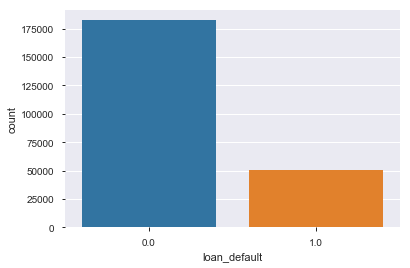

In [69]:
%matplotlib inline
sns.countplot(y)

In [113]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [124]:
p_lr=Pipeline([('sc',sc),('lr',LogisticRegression(n_jobs=-1))])
p_lr1=Pipeline([('sc1',sc),('lr1',LogisticRegression(penalty='l1',n_jobs=-1))])
p_rd=Pipeline([('sc',sc),('rd',RidgeClassifier())])
p_rf = Pipeline([('rf',RandomForestClassifier(n_jobs=-1))])
p_dt = Pipeline([('DT',DecisionTreeClassifier())])

In [125]:
grid_lr={'lr__class_weight':['balanced',None]}
grid_lr1={'lr1__class_weight':['balanced']}
grid_rd={'rd__normalize':[True,False]}
#grid_rf = {'rf__class_weight':['balanced',None],'rf__criterion':['gini','entropy'],'rf__n_estimators':[51,101,151],'rf__max_depth':[10,20,30],'rf__max_features':[None,'log2'],'rf__min_samples_split':[2,6,8],'rf__min_samples_leaf':[1,5,7]}
grid_rf = {'rf__class_weight':['balanced',None],'rf__criterion':['gini'],'rf__n_estimators':[501,401,301,201,101],'rf__max_depth':[10,20,30],'rf__min_samples_split':[4,6,8],'rf__min_samples_leaf':[2,5,7],'rf_bootstrap' : [True, False]}
grid_dt = {'dt__class_weight':['balanced',None],'dt__criterion':['gini','entropy'],'dt__min_samples_split':[2,6],'dt__min_samples_leaf':[1,5]}

In [126]:
cv =StratifiedKFold(n_splits=6).get_n_splits(x,y)

In [127]:
lr =GridSearchCV(p_lr,grid_lr,scoring='roc_auc',cv=cv,verbose=True)
lr1 =GridSearchCV(p_lr1,grid_lr1,scoring='roc_auc',cv=cv,verbose=True)
rd=GridSearchCV(p_rd,grid_rd,scoring='roc_auc',cv=cv,verbose=True)
rf=RandomizedSearchCV(p_rf,grid_rf,scoring='roc_auc',cv=cv,verbose=True)
dt=GridSearchCV(p_dt,grid_dt,scoring='roc_auc',cv=cv)

In [128]:
#model=[lr,lr1,rd]
model=[rf]
modelname=['LR','Lass','Rif','RF']

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [85]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

min_weight_fraction_leaf= [0.1,0.3,0.5]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              'min_weight_fraction_leaf':min_weight_fraction_leaf}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'min_weight_fraction_leaf': [0.1, 0.3, 0.5],
 'n_estimators': [200, 266, 333, 400, 466, 533, 600, 666, 733, 800]}


In [87]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 127.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 266, 333, 400, 466, 533, 600, 666, 733, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'min_weight_fraction_leaf': [0.1, 0.3, 0.5]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=

In [88]:
rf_random.best_params_

{'n_estimators': 200,
 'min_weight_fraction_leaf': 0.3,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [89]:
rf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.3, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
rf.fit(x,y)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.3, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [90]:
rf.fit(x_train,y_train)
k = rf.predict(x_test)
print(roc_auc_score(y_test,k))

0.5


In [130]:
ypred=pd.DataFrame()
for j,i in enumerate(model):
    i.fit(x_train,y_train)
    k=i.predict(x_test)
    ypred[modelname[j]] = k
    print(roc_auc_score(y_test,k))
    print(i.best_params_)
    print(i.best_score_)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter rf_bootstrap for estimator Pipeline(memory=None,
     steps=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [131]:
ypred=pd.DataFrame()
for j,i in enumerate(model):
    i.fit(x_train,y_train)
    k=i.predict(x_test)
    ypred[modelname[j]] = k
    print(roc_auc_score(y_test,k))
    print(i.best_params_)
    print(i.best_score_)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ValueError: Invalid parameter rf_bootstrap for estimator Pipeline(memory=None,
     steps=[('rf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [91]:
modl = RandomForestClassifier(n_estimators=301,max_depth=20,min_samples_split=6,min_samples_leaf=7,verbose=True)
modl.fit(x_train,y_train)
k = modl.predict(x_test)
print(roc_auc_score(y_test,k))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.5028818278576016


[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    6.7s finished


In [92]:
rfpred = modl.predict(tst)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 301 out of 301 | elapsed:    9.1s finished


In [62]:
out=pd.concat([test.UniqueID,pd.Series(k)],axis=1)
out.columns=['UniqueID','loan_default']


In [93]:
Final=test[["UniqueID","loan_default"]]

In [117]:
Final["loan_default"]=rfpred

C:\Users\VINOTH S\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [94]:
Final.head()

,UniqueID,loan_default
0,655269,NaN
1,723482,NaN
2,758529,NaN
3,763449,NaN
4,708663,NaN


In [95]:
out.loan_default=Final.loan_default.astype(np.int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [120]:
out.loan_default.value_counts()

0    112246
1       146
Name: loan_default, dtype: int64

In [113]:
out.to_csv('LTFSPred.csv',index=False)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
adabst_fit = AdaBoostClassifier(base_estimator= modl,
        n_estimators=22,learning_rate=0.05,random_state=42)